# Assignment: Activity Recognition "Classification, Feature Selection, and Dimensionality Reduction" 


Objective
In this assignment, you will work with an Activity Recognition dataset to explore, preprocess, and apply various classification algorithms.
You will build a Bayesian Classifier from scratch and apply multiple scikit-learn classifiers on both the entire dataset and reduced-feature versions.
Students will also compare the effects of Dimensionality Reduction (PCA, SVD) and Feature Selection methods on model performance.

You can download Activity_data.csv from the Files section for analysis and experimentation.

Dataset Description
The dataset Activity_data.csv contains 75,128 samples with nine columns, including time, tri-axial accelerations, signal strength (RSSI), phase, frequency, and antenna sensor ID.
It represents sensor-based measurements for various physical activities, with the Activity column as the target label.



Part 1: Data Preprocessing


A. Loading the Dataset
Load the dataset into a pandas DataFrame.

In [1]:
import pandas as pd
df = pd.read_csv("Activity_data.csv")
display(df.head())
print(f"Dataset contains {df.shape[0]:,} rows and {df.shape[1]} columns.")
print(df.isnull().sum())
df = df.dropna()
print(df.isnull().sum())
print(f"Final cleaned dataset shape: {df.shape}")


,Time,frontal_axis_Acceleration,vertical_axis+_Acceleration,lateral_axis_Acceleration,Antenna_ID_Sensor,RSSI,Phase,Frequency,Activity
0,0.00,-0.232160,0.215880,-1.18820,2,-48.5,2.74430,920.75,3
1,0.25,-0.056282,0.043636,-1.14260,2,-50.0,2.36540,921.75,3
2,0.50,0.143050,0.296270,-1.33640,3,-59.5,0.20709,922.25,3
3,0.75,0.318930,0.284780,-0.92593,2,-51.0,0.41571,923.25,3
4,1.05,0.412730,0.135500,-1.02860,2,-44.5,4.45470,920.25,3


Dataset contains 75,128 rows and 9 columns.
Time                           0
frontal_axis_Acceleration      0
vertical_axis+_Acceleration    0
lateral_axis_Acceleration      0
Antenna_ID_Sensor              0
RSSI                           0
 Phase                         0
Frequency                      0
Activity                       0
dtype: int64
Time                           0
frontal_axis_Acceleration      0
vertical_axis+_Acceleration    0
lateral_axis_Acceleration      0
Antenna_ID_Sensor              0
RSSI                           0
 Phase                         0
Frequency                      0
Activity                       0
dtype: int64
Final cleaned dataset shape: (75128, 9)


Display the first few rows and check for any missing values.

In [2]:
import pandas as pd
df = pd.read_csv("Activity_data.csv")
print("First few rows of the dataset:")
display(df.head())
print("\nMissing values in each column:")
print(df.isnull().sum())


First few rows of the dataset:


,Time,frontal_axis_Acceleration,vertical_axis+_Acceleration,lateral_axis_Acceleration,Antenna_ID_Sensor,RSSI,Phase,Frequency,Activity
0,0.00,-0.232160,0.215880,-1.18820,2,-48.5,2.74430,920.75,3
1,0.25,-0.056282,0.043636,-1.14260,2,-50.0,2.36540,921.75,3
2,0.50,0.143050,0.296270,-1.33640,3,-59.5,0.20709,922.25,3
3,0.75,0.318930,0.284780,-0.92593,2,-51.0,0.41571,923.25,3
4,1.05,0.412730,0.135500,-1.02860,2,-44.5,4.45470,920.25,3



Missing values in each column:
Time                           0
frontal_axis_Acceleration      0
vertical_axis+_Acceleration    0
lateral_axis_Acceleration      0
Antenna_ID_Sensor              0
RSSI                           0
 Phase                         0
Frequency                      0
Activity                       0
dtype: int64


Handle missing values appropriately (remove or impute).

In [3]:
import pandas as pd
df = pd.read_csv("Activity_data.csv")
df = df.dropna()  
print("Missing values after handling:")
print(df.isnull().sum())
print(f"\nFinal dataset shape: {df.shape}")


Missing values after handling:
Time                           0
frontal_axis_Acceleration      0
vertical_axis+_Acceleration    0
lateral_axis_Acceleration      0
Antenna_ID_Sensor              0
RSSI                           0
 Phase                         0
Frequency                      0
Activity                       0
dtype: int64

Final dataset shape: (75128, 9)


Split the dataset into training (80%) and testing (20%) sets. 

In [4]:
from sklearn.model_selection import train_test_split

X = df.drop("Activity", axis=1)
y = df["Activity"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set: {X_train.shape}")
print(f"Testing set: {X_test.shape}")


Training set: (60102, 8)
Testing set: (15026, 8)


Standardize continuous features using StandardScaler.


In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Standardization complete.")
print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"X_test_scaled shape: {X_test_scaled.shape}")


Standardization complete.
X_train_scaled shape: (60102, 8)
X_test_scaled shape: (15026, 8)


Encode any categorical features if necessary.

In [6]:
from sklearn.preprocessing import LabelEncoder

cat_cols = X.select_dtypes(include=['object']).columns

if len(cat_cols) > 0:
    encoder = LabelEncoder()
    for col in cat_cols:
        X_train[col] = encoder.fit_transform(X_train[col])
        X_test[col] = encoder.transform(X_test[col])
    print("Categorical features encoded successfully.")
else:
    print("No categorical features to encode.")


No categorical features to encode.


Implement a Bayesian classifier by estimating priors and Gaussian likelihoods for each class.

In [7]:
import numpy as np
from numpy.linalg import slogdet, inv
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Xtr = np.asarray(X_train_scaled)
Xte = np.asarray(X_test_scaled)
ytr = np.asarray(y_train)
yte = np.asarray(y_test)

classes = np.unique(ytr)
d = Xtr.shape[1]
eps = 1e-5

priors = {}
means = {}
covs = {}
inv_covs = {}
logdets = {}

for c in classes:
    Xc = Xtr[ytr == c]
    priors[c] = Xc.shape[0] / Xtr.shape[0]
    means[c] = Xc.mean(axis=0)
    C = np.cov(Xc, rowvar=False)
    C = C + eps * np.eye(d)
    covs[c] = C
    inv_covs[c] = inv(C)
    sign, ld = slogdet(C)
    logdets[c] = ld

def log_posterior(X):
    n = X.shape[0]
    S = np.zeros((n, len(classes)))
    for j, c in enumerate(classes):
        xc = X - means[c]
        q = np.einsum('ni,ij,nj->n', xc, inv_covs[c], xc)
        S[:, j] = (-0.5*q) - 0.5*logdets[c] - 0.5*d*np.log(2*np.pi) + np.log(priors[c])
    return S

def predict(X):
    S = log_posterior(X)
    idx = np.argmax(S, axis=1)
    return classes[idx]

y_pred = predict(Xte)
y_pred_tr = predict(Xtr)

print("Test Accuracy:", accuracy_score(yte, y_pred))
print("Train Accuracy:", accuracy_score(ytr, y_pred_tr))
print("\nClassification Report (Test):")
print(classification_report(yte, y_pred))
print("Confusion Matrix (Test):")
print(confusion_matrix(yte, y_pred))


Test Accuracy: 0.9584719818980434
Train Accuracy: 0.9567901234567902

Classification Report (Test):
              precision    recall  f1-score   support

           1       0.90      0.92      0.91      3250
           2       0.90      0.85      0.87      1002
           3       0.99      1.00      1.00     10313
           4       0.65      0.52      0.57       461

    accuracy                           0.96     15026
   macro avg       0.86      0.82      0.84     15026
weighted avg       0.96      0.96      0.96     15026

Confusion Matrix (Test):
[[ 3000    69    79   102]
 [  122   854     0    26]
 [    2     0 10310     1]
 [  192    28     3   238]]


Use Bayes’ theorem to compute posterior probabilities and assign classes accordingly.

In [8]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def posterior_proba(X):
    S = log_posterior(X)
    S -= S.max(axis=1, keepdims=True)
    P = np.exp(S)
    P /= P.sum(axis=1, keepdims=True)
    return P

P_test = posterior_proba(X_test_scaled)
y_pred_bayes = classes[np.argmax(P_test, axis=1)]

print("Test Accuracy:", accuracy_score(y_test, y_pred_bayes))
print("\nClassification Report (Test):")
print(classification_report(y_test, y_pred_bayes))
print("Confusion Matrix (Test):")
print(confusion_matrix(y_test, y_pred_bayes))


import pandas as pd
pd.DataFrame(P_test[:5], columns=[f"class_{c}" for c in classes])


Test Accuracy: 0.9584719818980434

Classification Report (Test):
              precision    recall  f1-score   support

           1       0.90      0.92      0.91      3250
           2       0.90      0.85      0.87      1002
           3       0.99      1.00      1.00     10313
           4       0.65      0.52      0.57       461

    accuracy                           0.96     15026
   macro avg       0.86      0.82      0.84     15026
weighted avg       0.96      0.96      0.96     15026

Confusion Matrix (Test):
[[ 3000    69    79   102]
 [  122   854     0    26]
 [    2     0 10310     1]
 [  192    28     3   238]]


,class_1,class_2,class_3,class_4
0,2.126700e-24,7.125273e-75,1.0,1.334733e-22
1,9.593219e-21,4.470771e-104,1.0,2.087294e-27
2,1.197025e-07,1.909751e-15,1.0,9.081578e-10
3,1.693912e-20,4.333281e-51,1.0,8.895918e-19
4,1.019717e-22,7.758473e-61,1.0,1.723526e-27


B. Other Classifiers (using scikit-learn)
Train and evaluate the following models:

Support Vector Machine (SVM) — Linear, RBF, and Polynomial kernels

k-Nearest Neighbors (KNN) — test different k values

Naive Bayes (GaussianNB)

Decision Tree Classifier

Random Forest Classifier

Ensemble Classifier — use Voting or Stacking with diverse base estimators



In [9]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

def eval_model(name, clf, Xtr, ytr, Xte, yte, show_report=True):
    clf.fit(Xtr, ytr)
    yp = clf.predict(Xte)
    acc = accuracy_score(yte, yp)
    f1 = f1_score(yte, yp, average="macro")
    print(f"\n{name}")
    print(f"Accuracy: {acc:.4f} | Macro-F1: {f1:.4f}")
    if show_report:
        print("Classification Report:")
        print(classification_report(yte, yp, zero_division=0))
        print("Confusion Matrix:")
        print(confusion_matrix(yte, yp))
    return name, acc, f1

results = []

svm_linear = SVC(kernel="linear", probability=True, class_weight="balanced", random_state=42)
results.append(eval_model("SVM (Linear, balanced)", svm_linear, X_train_scaled, y_train, X_test_scaled, y_test))

svm_rbf = SVC(kernel="rbf", probability=True, class_weight="balanced", random_state=42)
results.append(eval_model("SVM (RBF, balanced)", svm_rbf, X_train_scaled, y_train, X_test_scaled, y_test))

svm_poly = SVC(kernel="poly", degree=3, probability=True, class_weight="balanced", random_state=42)
results.append(eval_model("SVM (Poly deg=3, balanced)", svm_poly, X_train_scaled, y_train, X_test_scaled, y_test))

knn_ks = [3,5,7,9,11,15]
knn_scores = []
for k in knn_ks:
    knn = KNeighborsClassifier(n_neighbors=k)
    name, acc, f1 = eval_model(f"KNN (k={k})", knn, X_train_scaled, y_train, X_test_scaled, y_test, show_report=False)
    knn_scores.append((k, acc, f1))
best_k = sorted(knn_scores, key=lambda t: (-t[1], -t[2]))[0][0]
knn_best = KNeighborsClassifier(n_neighbors=best_k)
results.append(eval_model(f"KNN (best k={best_k})", knn_best, X_train_scaled, y_train, X_test_scaled, y_test))

gnb = GaussianNB()
results.append(eval_model("Naive Bayes (GaussianNB)", gnb, X_train_scaled, y_train, X_test_scaled, y_test))

dt = DecisionTreeClassifier(random_state=42, class_weight="balanced")
results.append(eval_model("Decision Tree (balanced)", dt, X_train_scaled, y_train, X_test_scaled, y_test))

rf = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=1, class_weight="balanced_subsample")
results.append(eval_model("Random Forest (200, balanced_subsample)", rf, X_train_scaled, y_train, X_test_scaled, y_test))

voting_soft = VotingClassifier(
    estimators=[
        ("svm_lin", SVC(kernel="linear", probability=True, class_weight="balanced", random_state=42)),
        ("knn", KNeighborsClassifier(n_neighbors=best_k)),
        ("dt", DecisionTreeClassifier(random_state=42, class_weight="balanced"))
    ],
    voting="soft"
)
results.append(eval_model("Ensemble (Soft Voting)", voting_soft, X_train_scaled, y_train, X_test_scaled, y_test))

stacking = StackingClassifier(
    estimators=[
        ("svm_lin", SVC(kernel="linear", probability=True, class_weight="balanced", random_state=42)),
        ("knn", KNeighborsClassifier(n_neighbors=best_k)),
        ("dt", DecisionTreeClassifier(random_state=42, class_weight="balanced"))
    ],
    final_estimator=LogisticRegression(max_iter=1000, random_state=42),
    passthrough=False,
    n_jobs=1
)
results.append(eval_model("Ensemble (Stacking)", stacking, X_train_scaled, y_train, X_test_scaled, y_test))

df_results = pd.DataFrame(results, columns=["Model", "Accuracy", "MacroF1"]).sort_values(by=["Accuracy","MacroF1"], ascending=False)
print("\nSummary (sorted):")
display(df_results)

print("\nKNN k-sweep:")
display(pd.DataFrame(knn_scores, columns=["k","Accuracy","MacroF1"]).sort_values(by=["Accuracy","MacroF1"], ascending=False))



SVM (Linear, balanced)
Accuracy: 0.8789 | Macro-F1: 0.6604
Classification Report:
              precision    recall  f1-score   support

           1       0.82      0.61      0.70      3250
           2       0.46      0.67      0.55      1002
           3       1.00      1.00      1.00     10313
           4       0.30      0.56      0.39       461

    accuracy                           0.88     15026
   macro avg       0.65      0.71      0.66     15026
weighted avg       0.90      0.88      0.89     15026

Confusion Matrix:
[[ 1990   743    19   498]
 [  235   676     0    91]
 [   29     1 10283     0]
 [  159    45     0   257]]

SVM (RBF, balanced)
Accuracy: 0.9695 | Macro-F1: 0.8817
Classification Report:
              precision    recall  f1-score   support

           1       0.96      0.91      0.94      3250
           2       0.88      0.98      0.93      1002
           3       1.00      1.00      1.00     10313
           4       0.65      0.69      0.67       461

   

,Model,Accuracy,MacroF1
6,"Random Forest (200, balanced_subsample)",0.989219,0.951533
8,Ensemble (Stacking),0.987688,0.946721
7,Ensemble (Soft Voting),0.986424,0.941332
5,Decision Tree (balanced),0.986024,0.940350
3,KNN (best k=3),0.984227,0.936745
1,"SVM (RBF, balanced)",0.969519,0.881656
2,"SVM (Poly deg=3, balanced)",0.966059,0.869727
4,Naive Bayes (GaussianNB),0.939971,0.786721
0,"SVM (Linear, balanced)",0.878877,0.660433



KNN k-sweep:


,k,Accuracy,MacroF1
0,3,0.984227,0.936745
1,5,0.982231,0.929531
2,7,0.979103,0.916264
3,9,0.975775,0.900092
4,11,0.972714,0.884555
5,15,0.972048,0.879423


Compute Accuracy, Precision, Recall, and F1-score.

In [48]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

models = {
    "SVM (Linear, balanced)": svm_linear,
    "SVM (RBF, balanced)": svm_rbf,
    "SVM (Poly deg=3, balanced)": svm_poly,
    "KNN (best k)": knn_best,
    "GaussianNB": gnb,
    "Decision Tree (balanced)": dt,
    "Random Forest (200, balanced_subsample)": rf,
    "Ensemble (Soft Voting)": voting_soft,
    "Ensemble (Stacking)": stacking
}

rows = []
for name, clf in models.items():
    clf.fit(X_train_scaled, y_train)
    yp = clf.predict(X_test_scaled)
    rows.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, yp),
        "Precision (macro)": precision_score(y_test, yp, average="macro", zero_division=0),
        "Recall (macro)": recall_score(y_test, yp, average="macro", zero_division=0),
        "F1 (macro)": f1_score(y_test, yp, average="macro", zero_division=0)
    })

df_metrics_all = pd.DataFrame(rows).sort_values(["Accuracy","F1 (macro)"], ascending=False).reset_index(drop=True)
display(df_metrics_all)


,Model,Accuracy,Precision (macro),Recall (macro),F1 (macro)
0,"Random Forest (200, balanced_subsample)",0.989219,0.976872,0.932852,0.951533
1,Ensemble (Stacking),0.987688,0.966772,0.931683,0.946721
2,Ensemble (Soft Voting),0.986424,0.970598,0.920426,0.941332
3,Decision Tree (balanced),0.986024,0.950239,0.931863,0.940350
4,KNN (best k),0.984227,0.959685,0.919974,0.936745
5,"SVM (RBF, balanced)",0.969519,0.870504,0.894696,0.881656
6,"SVM (Poly deg=3, balanced)",0.966059,0.857326,0.884459,0.869727
7,GaussianNB,0.939971,0.873438,0.740686,0.786721
8,"SVM (Linear, balanced)",0.878877,0.647018,0.710383,0.660433


Plot Confusion Matrices to visualize classification performance.


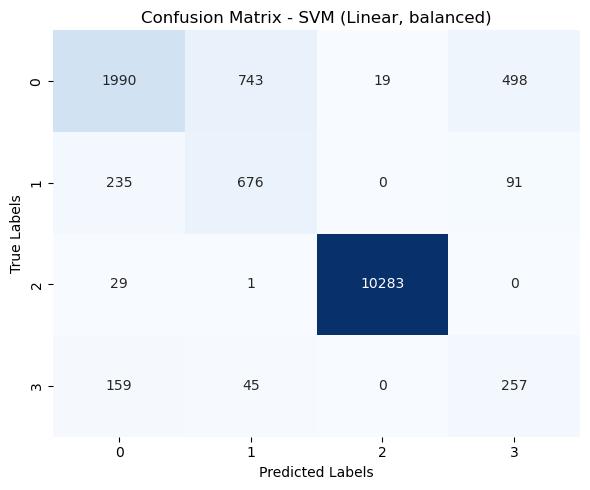

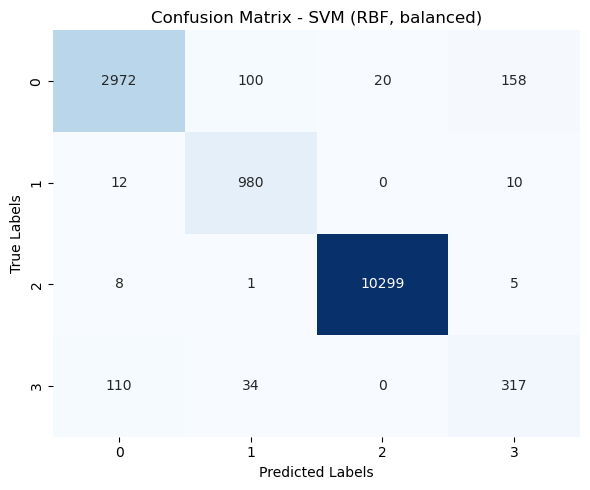

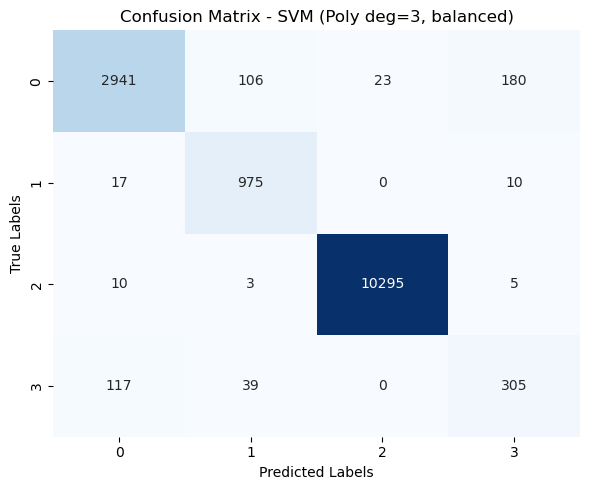

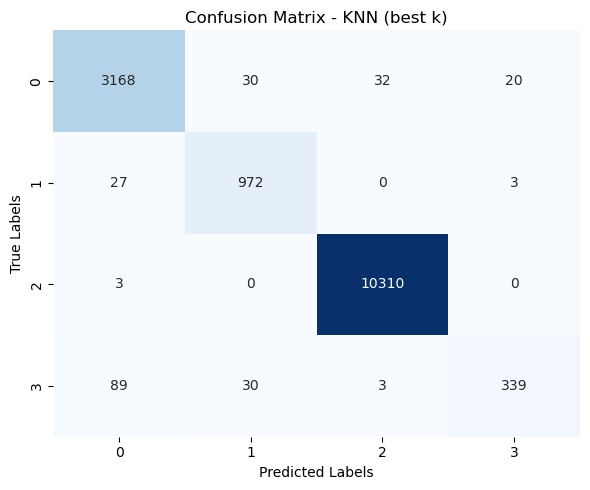

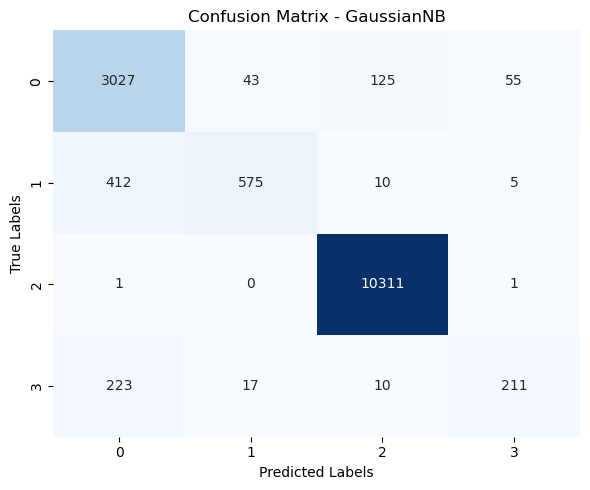

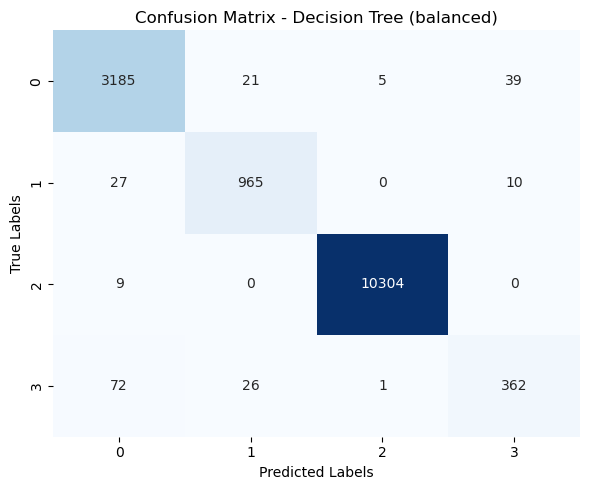

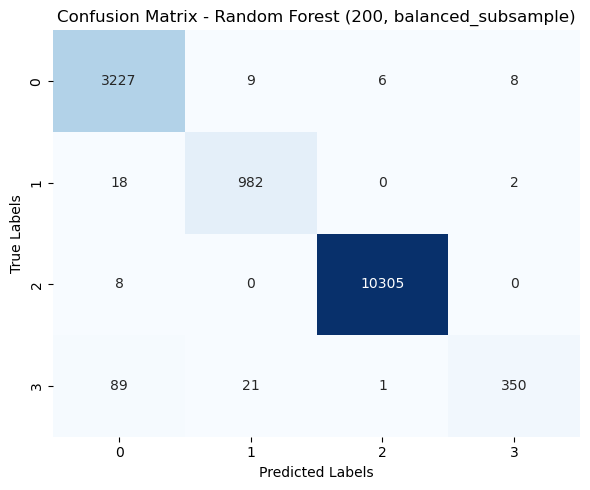

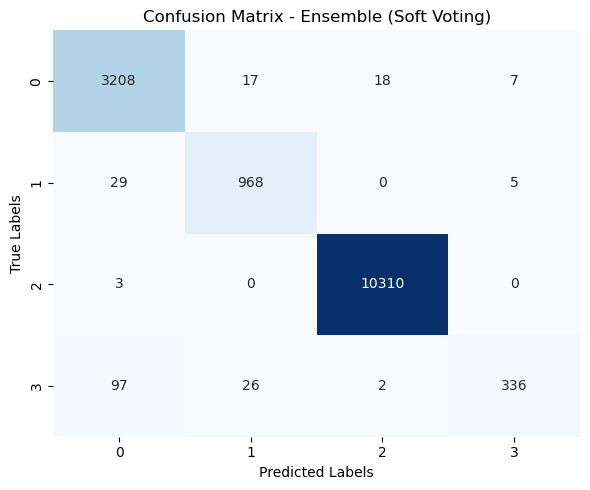

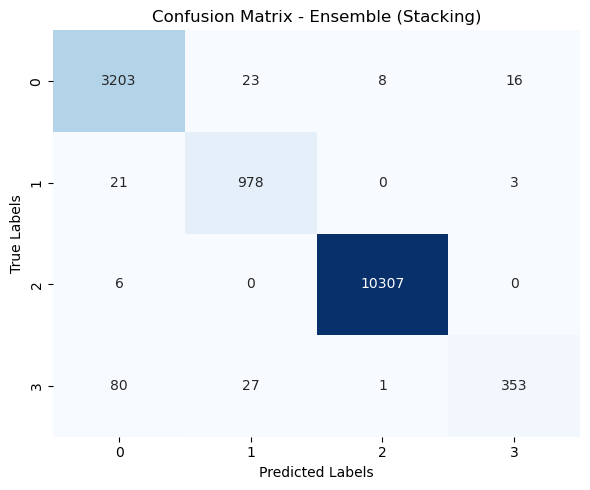

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

models = {
    "SVM (Linear, balanced)": svm_linear,
    "SVM (RBF, balanced)": svm_rbf,
    "SVM (Poly deg=3, balanced)": svm_poly,
    "KNN (best k)": knn_best,
    "GaussianNB": gnb,
    "Decision Tree (balanced)": dt,
    "Random Forest (200, balanced_subsample)": rf,
    "Ensemble (Soft Voting)": voting_soft,
    "Ensemble (Stacking)": stacking
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.tight_layout()
    plt.show()


Apply PCA to reduce dimensionality while preserving 95% of the variance.

In [12]:
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

pca = PCA(n_components=0.95, svd_solver="full")
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"n_components (95% variance): {pca.n_components_}")
print(f"Explained variance retained: {pca.explained_variance_ratio_.sum():.4f}")

rf_pca = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=1, class_weight="balanced_subsample")
rf_pca.fit(X_train_pca, y_train)
y_pred_pca = rf_pca.predict(X_test_pca)

acc = accuracy_score(y_test, y_pred_pca)
f1m = f1_score(y_test, y_pred_pca, average="macro")
print(f"Accuracy: {acc:.4f} | Macro-F1: {f1m:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_pca, zero_division=0))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_pca))


n_components (95% variance): 7
Explained variance retained: 0.9861
Accuracy: 0.9844 | Macro-F1: 0.9381
Classification Report:
              precision    recall  f1-score   support

           1       0.96      0.98      0.97      3250
           2       0.96      0.96      0.96      1002
           3       1.00      1.00      1.00     10313
           4       0.98      0.71      0.82       461

    accuracy                           0.98     15026
   macro avg       0.97      0.91      0.94     15026
weighted avg       0.98      0.98      0.98     15026

Confusion Matrix:
[[ 3193    13    40     4]
 [   33   965     1     3]
 [    6     0 10307     0]
 [  107    24     3   327]]


Visualize the first two principal components.

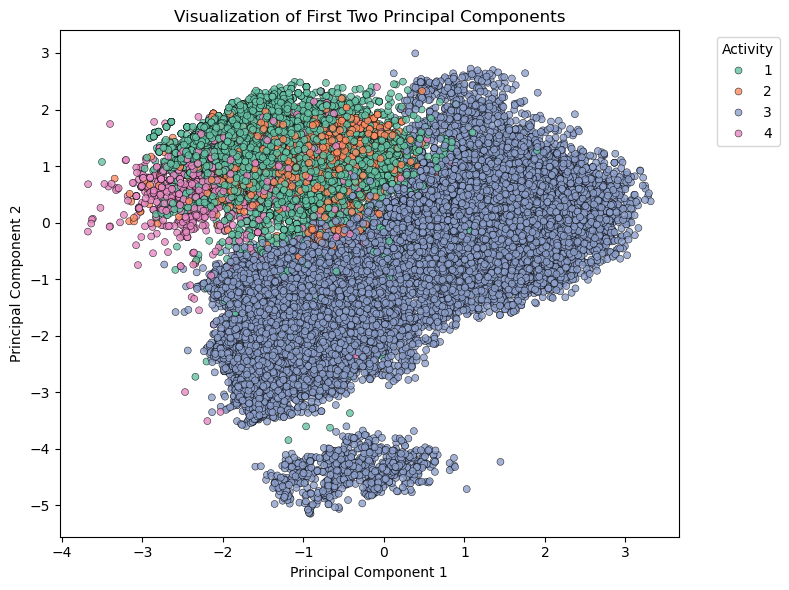

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(
    x=X_train_pca[:,0],
    y=X_train_pca[:,1],
    hue=y_train,
    palette="Set2",
    s=25,
    alpha=0.8,
    edgecolor="k"
)
plt.title("Visualization of First Two Principal Components")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Activity", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Apply Truncated SVD on the same dataset and compare results with PCA.

In [14]:
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

# Apply Truncated SVD using same number of components as PCA
svd = TruncatedSVD(n_components=pca.n_components_, random_state=42)
X_train_svd = svd.fit_transform(X_train_scaled)
X_test_svd = svd.transform(X_test_scaled)

print(f"Truncated SVD components used: {svd.n_components}")
print(f"Explained variance (approx): {svd.explained_variance_ratio_.sum():.4f}")

# Train Random Forest model on SVD-transformed data
rf_svd = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=1,
    class_weight="balanced_subsample"
)
rf_svd.fit(X_train_svd, y_train)
y_pred_svd = rf_svd.predict(X_test_svd)

# Evaluate model performance
acc_svd = accuracy_score(y_test, y_pred_svd)
f1_svd = f1_score(y_test, y_pred_svd, average="macro")

print(f"\nTruncated SVD - Accuracy: {acc_svd:.4f} | Macro-F1: {f1_svd:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_svd, zero_division=0))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svd))

# --- Compare with PCA results ---
print("\nPCA vs Truncated SVD Comparison:")
print(f"PCA  -> Components: {pca.n_components_}, Accuracy: {acc:.4f}, Macro-F1: {f1m:.4f}")
print(f"SVD  -> Components: {svd.n_components}, Accuracy: {acc_svd:.4f}, Macro-F1: {f1_svd:.4f}")


Truncated SVD components used: 7
Explained variance (approx): 0.9861

Truncated SVD - Accuracy: 0.9844 | Macro-F1: 0.9381
Classification Report:
              precision    recall  f1-score   support

           1       0.96      0.98      0.97      3250
           2       0.96      0.96      0.96      1002
           3       1.00      1.00      1.00     10313
           4       0.98      0.71      0.82       461

    accuracy                           0.98     15026
   macro avg       0.97      0.91      0.94     15026
weighted avg       0.98      0.98      0.98     15026

Confusion Matrix:
[[ 3193    13    40     4]
 [   33   965     1     3]
 [    6     0 10307     0]
 [  107    24     3   327]]

PCA vs Truncated SVD Comparison:
PCA  -> Components: 7, Accuracy: 0.9844, Macro-F1: 0.9381
SVD  -> Components: 7, Accuracy: 0.9844, Macro-F1: 0.9381


Visualize reduced features for interpretability.

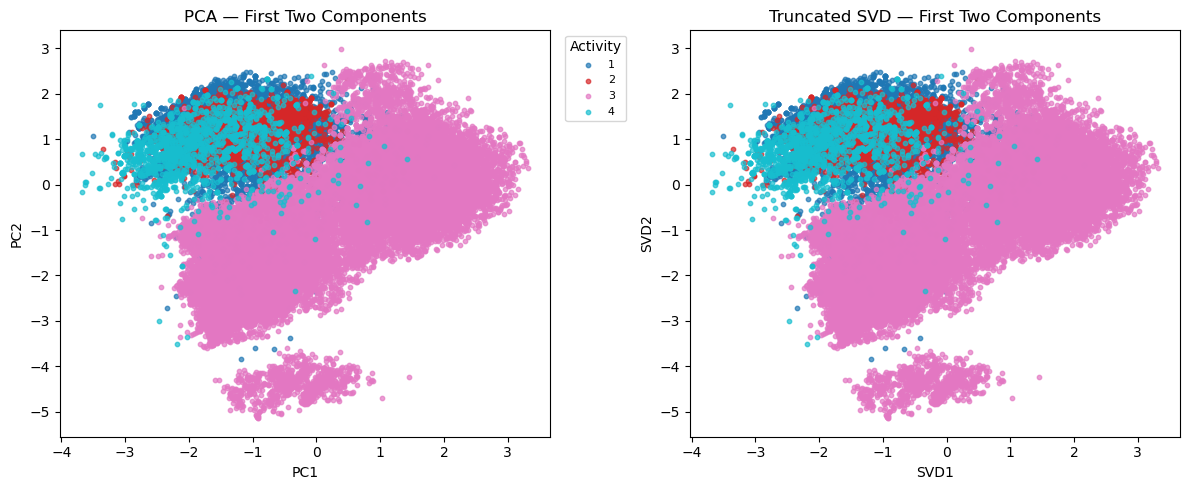

In [15]:
import matplotlib.pyplot as plt
import numpy as np

pc1, pc2 = X_train_pca[:, 0], X_train_pca[:, 1]
svd1, svd2 = X_train_svd[:, 0], X_train_svd[:, 1]

classes_unique = np.unique(y_train)
colors = plt.cm.tab10(np.linspace(0, 1, len(classes_unique)))

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharex=False, sharey=False)

for c, col in zip(classes_unique, colors):
    axes[0].scatter(pc1[y_train==c], pc2[y_train==c], s=10, alpha=0.7, label=str(c), color=col)
axes[0].set_title("PCA — First Two Components")
axes[0].set_xlabel("PC1")
axes[0].set_ylabel("PC2")
axes[0].legend(title="Activity", bbox_to_anchor=(1.02, 1), loc="upper left", fontsize=8)

for c, col in zip(classes_unique, colors):
    axes[1].scatter(svd1[y_train==c], svd2[y_train==c], s=10, alpha=0.7, label=str(c), color=col)
axes[1].set_title("Truncated SVD — First Two Components")
axes[1].set_xlabel("SVD1")
axes[1].set_ylabel("SVD2")

plt.tight_layout()
plt.show()


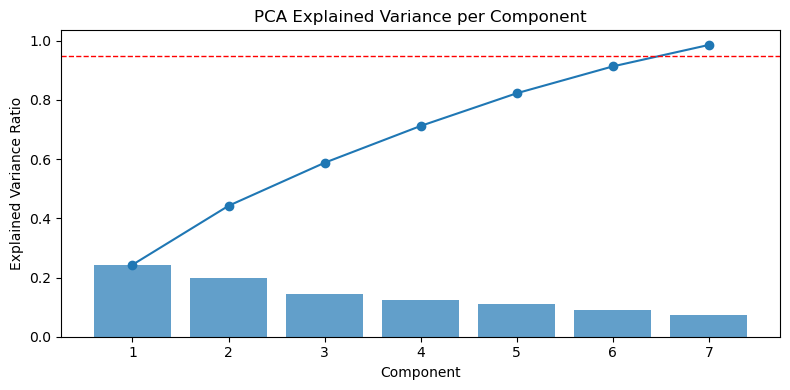

In [16]:
import numpy as np
import matplotlib.pyplot as plt

var = pca.explained_variance_ratio_
cum = np.cumsum(var)
idx = np.arange(1, len(var)+1)

plt.figure(figsize=(8,4))
plt.bar(idx, var, alpha=0.7)
plt.plot(idx, cum, marker='o')
plt.axhline(0.95, color='r', linestyle='--', linewidth=1)
plt.title("PCA Explained Variance per Component")
plt.xlabel("Component")
plt.ylabel("Explained Variance Ratio")
plt.tight_layout()
plt.show()


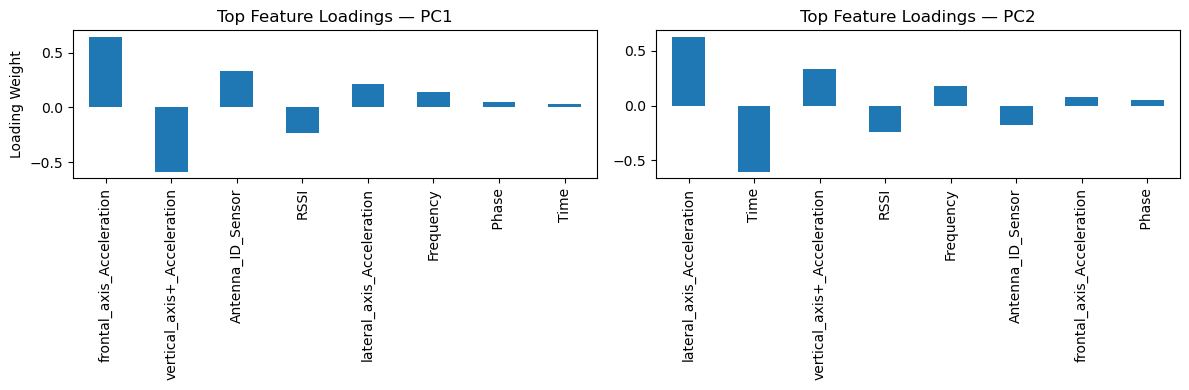

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

feature_names = X.columns
loadings = pd.DataFrame(pca.components_[:2].T, index=feature_names, columns=["PC1","PC2"])
abs_loadings = loadings.abs().sort_values(by=["PC1","PC2"], ascending=False)

top_k = 10
top_features = abs_loadings.head(top_k).index
to_plot = loadings.loc[top_features]

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
to_plot["PC1"].sort_values(key=np.abs, ascending=False).plot(kind="bar", ax=axes[0])
axes[0].set_title("Top Feature Loadings — PC1")
axes[0].set_ylabel("Loading Weight")

to_plot["PC2"].sort_values(key=np.abs, ascending=False).plot(kind="bar", ax=axes[1])
axes[1].set_title("Top Feature Loadings — PC2")

plt.tight_layout()
plt.show()


Part 4: Feature Selection Methods
Apply and compare the following Feature Selection (FS) techniques individually:

Variance Thresholding — remove low-variance features.

Correlation Filtering — drop features with high correlation (|ρ| > threshold).

Chi-Square (χ²) — applicable to non-negative features.

Entropy / Mutual Information — estimate information gain using mutual_info_classif.

Sequential Feature Selection (SFS/SBS) — select optimal subsets using a base estimator.


In [18]:
from sklearn.feature_selection import VarianceThreshold

vt = VarianceThreshold(threshold=0.01)
X_vt = vt.fit_transform(X_train_scaled)

print(f"Original feature count: {X_train_scaled.shape[1]}")
print(f"After Variance Thresholding: {X_vt.shape[1]} features retained")


Original feature count: 8
After Variance Thresholding: 8 features retained


In [19]:
import numpy as np
import pandas as pd

corr_matrix = pd.DataFrame(X_train_scaled, columns=X.columns).corr().abs()
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [c for c in upper_tri.columns if any(upper_tri[c] > 0.9)]

X_corr = pd.DataFrame(X_train_scaled, columns=X.columns).drop(columns=to_drop)

print(f"Highly correlated features dropped: {len(to_drop)}")
print(f"Remaining features after Correlation Filtering: {X_corr.shape[1]}")


Highly correlated features dropped: 0
Remaining features after Correlation Filtering: 8


In [20]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler

X_train_pos = MinMaxScaler().fit_transform(X_train_scaled)
X_test_pos  = MinMaxScaler().fit_transform(X_test_scaled)

chi2_selector = SelectKBest(score_func=chi2, k=8)
X_train_chi2 = chi2_selector.fit_transform(X_train_pos, y_train)
X_test_chi2  = chi2_selector.transform(X_test_pos)

print(f"Top features selected by χ²: {chi2_selector.get_feature_names_out(X.columns)}")
print(f"Reduced feature shape: {X_train_chi2.shape}")


Top features selected by χ²: ['Time' 'frontal_axis_Acceleration' 'vertical_axis+_Acceleration'
 'lateral_axis_Acceleration' 'Antenna_ID_Sensor' 'RSSI' ' Phase'
 'Frequency']
Reduced feature shape: (60102, 8)


In [21]:
from sklearn.feature_selection import mutual_info_classif

mi = mutual_info_classif(X_train_scaled, y_train, random_state=42)
mi_series = pd.Series(mi, index=X.columns).sort_values(ascending=False)

top_k = 8
top_features_mi = mi_series.head(top_k).index.tolist()

X_train_mi = pd.DataFrame(X_train_scaled, columns=X.columns)[top_features_mi]
X_test_mi  = pd.DataFrame(X_test_scaled, columns=X.columns)[top_features_mi]

print("Top features by Mutual Information:")
display(mi_series.head(top_k))


Top features by Mutual Information:


vertical_axis+_Acceleration    0.642661
frontal_axis_Acceleration      0.279782
lateral_axis_Acceleration      0.227445
Antenna_ID_Sensor              0.161463
Time                           0.148370
RSSI                           0.139107
 Phase                         0.135117
Frequency                      0.000182
dtype: float64

In [22]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report
import pandas as pd

n_features = X_train_scaled.shape[1]
k = min(8, n_features - 1)

base_rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=1)

sfs_fwd = SequentialFeatureSelector(base_rf, n_features_to_select=k, direction='forward', n_jobs=-1)
sfs_fwd.fit(X_train_scaled, y_train)
sel_fwd = X.columns[sfs_fwd.get_support()]

sfs_bwd = SequentialFeatureSelector(base_rf, n_features_to_select=k, direction='backward', n_jobs=-1)
sfs_bwd.fit(X_train_scaled, y_train)
sel_bwd = X.columns[sfs_bwd.get_support()]

print(f"Forward SFS ({k} features):", sel_fwd.tolist())
print(f"Backward SFS ({k} features):", sel_bwd.tolist())

rf_eval = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=1, class_weight="balanced_subsample")

Xtr_fwd = pd.DataFrame(X_train_scaled, columns=X.columns)[sel_fwd]
Xte_fwd = pd.DataFrame(X_test_scaled, columns=X.columns)[sel_fwd]
rf_eval.fit(Xtr_fwd, y_train)
yp_fwd = rf_eval.predict(Xte_fwd)
print("\nForward SFS — Accuracy:", round(accuracy_score(y_test, yp_fwd),4),
      "| Macro-F1:", round(f1_score(y_test, yp_fwd, average='macro'),4))
print(classification_report(y_test, yp_fwd, zero_division=0))

Xtr_bwd = pd.DataFrame(X_train_scaled, columns=X.columns)[sel_bwd]
Xte_bwd = pd.DataFrame(X_test_scaled, columns=X.columns)[sel_bwd]
rf_eval.fit(Xtr_bwd, y_train)
yp_bwd = rf_eval.predict(Xte_bwd)
print("\nBackward SFS — Accuracy:", round(accuracy_score(y_test, yp_bwd),4),
      "| Macro-F1:", round(f1_score(y_test, yp_bwd, average='macro'),4))
print(classification_report(y_test, yp_bwd, zero_division=0))


Forward SFS (7 features): ['Time', 'frontal_axis_Acceleration', 'vertical_axis+_Acceleration', 'lateral_axis_Acceleration', 'Antenna_ID_Sensor', 'RSSI', 'Frequency']
Backward SFS (7 features): ['Time', 'frontal_axis_Acceleration', 'vertical_axis+_Acceleration', 'lateral_axis_Acceleration', 'Antenna_ID_Sensor', 'RSSI', 'Frequency']

Forward SFS — Accuracy: 0.9903 | Macro-F1: 0.9558
              precision    recall  f1-score   support

           1       0.97      0.99      0.98      3250
           2       0.97      0.99      0.98      1002
           3       1.00      1.00      1.00     10313
           4       0.97      0.78      0.86       461

    accuracy                           0.99     15026
   macro avg       0.98      0.94      0.96     15026
weighted avg       0.99      0.99      0.99     15026


Backward SFS — Accuracy: 0.9903 | Macro-F1: 0.9558
              precision    recall  f1-score   support

           1       0.97      0.99      0.98      3250
           2       0

Evaluate models using FS to analyze performance changes.

In [23]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np

def evaluate_fs_method(name, feature_set):
    Xtr = pd.DataFrame(X_train_scaled, columns=X.columns)[feature_set]
    Xte = pd.DataFrame(X_test_scaled, columns=X.columns)[feature_set]
    clf = RandomForestClassifier(
        n_estimators=200,
        random_state=42,
        n_jobs=1,
        class_weight="balanced_subsample"
    )
    clf.fit(Xtr, y_train)
    yp = clf.predict(Xte)
    return {
        "Method": name,
        "Features": len(feature_set),
        "Accuracy": accuracy_score(y_test, yp),
        "MacroF1": f1_score(y_test, yp, average="macro")
    }

results_eval = []

results_eval.append(evaluate_fs_method("All Features", X.columns))
results_eval.append(evaluate_fs_method("Variance Threshold", list(np.array(X.columns)[vt.get_support()])))
results_eval.append(evaluate_fs_method("Correlation Filter", list(X_corr.columns)))
results_eval.append(evaluate_fs_method("Chi-Square", list(chi2_selector.get_feature_names_out(X.columns))))
results_eval.append(evaluate_fs_method("Mutual Information", list(top_features_mi)))
results_eval.append(evaluate_fs_method("Sequential FS (Forward)", list(sel_fwd)))
results_eval.append(evaluate_fs_method("Sequential FS (Backward)", list(sel_bwd)))

df_eval = pd.DataFrame(results_eval).sort_values(["Accuracy", "MacroF1"], ascending=False).reset_index(drop=True)
display(df_eval)



,Method,Features,Accuracy,MacroF1
0,Sequential FS (Forward),7,0.990284,0.955824
1,Sequential FS (Backward),7,0.990284,0.955824
2,All Features,8,0.989219,0.951533
3,Variance Threshold,8,0.989219,0.951533
4,Correlation Filter,8,0.989219,0.951533
5,Chi-Square,8,0.989219,0.951533
6,Mutual Information,8,0.989086,0.950792


Apply your Bayesian Classifier (from scratch) to PCA and SVD reduced data.

In [24]:
import numpy as np
from numpy.linalg import slogdet, inv
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

def fit_gaussian_bayes(X, y, eps=1e-5):
    X = np.asarray(X); y = np.asarray(y)
    classes = np.unique(y)
    d = X.shape[1]
    priors = {}
    means = {}
    inv_covs = {}
    logdets = {}
    for c in classes:
        Xc = X[y == c]
        priors[c] = Xc.shape[0] / X.shape[0]
        mu = Xc.mean(axis=0)
        C = np.cov(Xc, rowvar=False) + eps*np.eye(d)
        means[c] = mu
        inv_covs[c] = inv(C)
        logdets[c] = slogdet(C)[1]
    return {"classes": classes, "d": d, "priors": priors, "means": means, "inv_covs": inv_covs, "logdets": logdets}

def log_posterior(model, X):
    X = np.asarray(X)
    classes = model["classes"]; d = model["d"]
    means = model["means"]; inv_covs = model["inv_covs"]; logdets = model["logdets"]; priors = model["priors"]
    S = np.zeros((X.shape[0], len(classes)))
    for j, c in enumerate(classes):
        xc = X - means[c]
        q = np.einsum('ni,ij,nj->n', xc, inv_covs[c], xc)
        S[:, j] = (-0.5*q) - 0.5*logdets[c] - 0.5*d*np.log(2*np.pi) + np.log(priors[c])
    return S

def predict(model, X):
    S = log_posterior(model, X)
    return model["classes"][np.argmax(S, axis=1)]

def evaluate_bayes(name, Xtr, ytr, Xte, yte):
    model = fit_gaussian_bayes(Xtr, ytr)
    yp_tr = predict(model, Xtr)
    yp_te = predict(model, Xte)
    acc_tr = accuracy_score(ytr, yp_tr)
    acc_te = accuracy_score(yte, yp_te)
    f1_te = f1_score(yte, yp_te, average="macro")
    print(f"\n{name}")
    print(f"Train Acc: {acc_tr:.4f} | Test Acc: {acc_te:.4f} | Test Macro-F1: {f1_te:.4f}")
    print("Classification Report (Test):")
    print(classification_report(yte, yp_te, zero_division=0))
    print("Confusion Matrix (Test):")
    print(confusion_matrix(yte, yp_te))
    return {"model": model, "y_pred": yp_te, "acc": acc_te, "f1_macro": f1_te}

res_pca = evaluate_bayes("Gaussian Bayes on PCA-reduced data", X_train_pca, y_train, X_test_pca, y_test)
res_svd = evaluate_bayes("Gaussian Bayes on Truncated SVD-reduced data", X_train_svd, y_train, X_test_svd, y_test)

print("\nSummary:")
print(f"PCA → Acc: {res_pca['acc']:.4f}, Macro-F1: {res_pca['f1_macro']:.4f}")
print(f"SVD → Acc: {res_svd['acc']:.4f}, Macro-F1: {res_svd['f1_macro']:.4f}")



Gaussian Bayes on PCA-reduced data
Train Acc: 0.9488 | Test Acc: 0.9480 | Test Macro-F1: 0.8283
Classification Report (Test):
              precision    recall  f1-score   support

           1       0.86      0.93      0.90      3250
           2       0.86      0.80      0.83      1002
           3       0.99      0.99      0.99     10313
           4       0.78      0.49      0.60       461

    accuracy                           0.95     15026
   macro avg       0.87      0.80      0.83     15026
weighted avg       0.95      0.95      0.95     15026

Confusion Matrix (Test):
[[ 3032    68    96    54]
 [  197   799     1     5]
 [   87    33 10190     3]
 [  208    25     4   224]]

Gaussian Bayes on Truncated SVD-reduced data
Train Acc: 0.9488 | Test Acc: 0.9480 | Test Macro-F1: 0.8283
Classification Report (Test):
              precision    recall  f1-score   support

           1       0.86      0.93      0.90      3250
           2       0.86      0.80      0.83      1002
    

Apply all scikit-learn classifiers to:

PCA-only features

SVD-only features

FS-only features


In [26]:
import numpy as np, pandas as pd
from sklearn.metrics import accuracy_score, f1_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

def get_models(k=None):
    if k is None: k = 3
    return {
        "SVM_RBF": SVC(kernel="rbf", class_weight="balanced", probability=False, random_state=42),
        "KNN": KNeighborsClassifier(n_neighbors=k),
        "GNB": GaussianNB(),
        "DT": DecisionTreeClassifier(random_state=42, class_weight="balanced"),
        "RF": RandomForestClassifier(n_estimators=150, random_state=42, n_jobs=1, class_weight="balanced_subsample"),
    }

def quick_eval(Xtr, ytr, Xte, yte, k=None):
    rows=[]
    for name, clf in get_models(k).items():
        clf.fit(Xtr, ytr)
        yp = clf.predict(Xte)
        rows.append([name,
                     accuracy_score(yte, yp),
                     f1_score(yte, yp, average="macro")])
    return pd.DataFrame(rows, columns=["Model","Accuracy","MacroF1"]).sort_values(["Accuracy","MacroF1"], ascending=False).reset_index(drop=True)


In [27]:
df_pca_eval = quick_eval(X_train_pca, y_train, X_test_pca, y_test, k=3)
df_pca_eval


,Model,Accuracy,MacroF1
0,RF,0.984294,0.937775
1,KNN,0.983362,0.934300
2,DT,0.971982,0.902859
3,SVM_RBF,0.964062,0.866517
4,GNB,0.897045,0.609836


In [28]:
df_svd_eval = quick_eval(X_train_svd, y_train, X_test_svd, y_test, k=3)
df_svd_eval


,Model,Accuracy,MacroF1
0,RF,0.984294,0.937775
1,KNN,0.983362,0.934300
2,DT,0.971982,0.902859
3,SVM_RBF,0.964062,0.866517
4,GNB,0.897045,0.609836


In [31]:
import warnings, multiprocessing
warnings.filterwarnings("ignore", category=UserWarning)
multiprocessing.set_start_method("fork", force=True)




import pandas as pd
cands = []
if "sel_fwd" in globals(): cands.append(("SFS_Forward", list(sel_fwd)))
if "sel_bwd" in globals(): cands.append(("SFS_Backward", list(sel_bwd)))
if "top_features_mi" in globals(): cands.append(("MutualInfo", list(top_features_mi)))
if "chi2_selector" in globals(): cands.append(("Chi2", list(chi2_selector.get_feature_names_out(X.columns))))
if "X_corr" in globals(): cands.append(("CorrFilter", list(X_corr.columns)))

if not cands: 
    cands.append(("AllFeatures", list(X.columns)))

fs_results = []
for name, feats in cands:
    Xtr_fs = pd.DataFrame(X_train_scaled, columns=X.columns)[feats].to_numpy()
    Xte_fs = pd.DataFrame(X_test_scaled,  columns=X.columns)[feats].to_numpy()
    df_eval = quick_eval(Xtr_fs, y_train, Xte_fs, y_test, k=3)
    df_eval.insert(0, "FS_Method", name)
    df_eval.insert(1, "n_features", len(feats))
    fs_results.append(df_eval)

df_fs_eval = pd.concat(fs_results, ignore_index=True)
df_fs_eval


,FS_Method,n_features,Model,Accuracy,MacroF1
0,SFS_Forward,7,RF,0.990417,0.956205
1,SFS_Forward,7,DT,0.987621,0.947413
2,SFS_Forward,7,KNN,0.984893,0.938973
3,SFS_Forward,7,SVM_RBF,0.969852,0.880554
4,SFS_Forward,7,GNB,0.939571,0.785451
5,SFS_Backward,7,RF,0.990417,0.956205
6,SFS_Backward,7,DT,0.987621,0.947413
7,SFS_Backward,7,KNN,0.984893,0.938973
8,SFS_Backward,7,SVM_RBF,0.969852,0.880554
9,SFS_Backward,7,GNB,0.939571,0.785451


Re-evaluate performance using the same metrics.

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def print_metrics(y_true, y_pred, label=""):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='macro', zero_division=0)
    rec = recall_score(y_true, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='macro', zero_division=0)
    print(label)
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1-Score : {f1:.4f}")


In [34]:
from sklearn.ensemble import RandomForestClassifier

rf_pca = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=1, class_weight="balanced_subsample")
rf_pca.fit(X_train_pca, y_train)
y_pred_pca = rf_pca.predict(X_test_pca)
print_metrics(y_test, y_pred_pca, label="PCA-only features")


PCA-only features
Accuracy : 0.9844
Precision: 0.9735
Recall   : 0.9136
F1-Score : 0.9381


In [35]:
from sklearn.ensemble import RandomForestClassifier

rf_svd = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=1, class_weight="balanced_subsample")
rf_svd.fit(X_train_svd, y_train)
y_pred_svd = rf_svd.predict(X_test_svd)
print_metrics(y_test, y_pred_svd, label="SVD-only features")


SVD-only features
Accuracy : 0.9844
Precision: 0.9735
Recall   : 0.9136
F1-Score : 0.9381


In [36]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

if "sel_fwd" in globals():
    FS_FEATS = list(sel_fwd)
elif "top_features_mi" in globals():
    FS_FEATS = list(top_features_mi)
elif "chi2_selector" in globals():
    FS_FEATS = list(chi2_selector.get_feature_names_out(X.columns))
elif "X_corr" in globals():
    FS_FEATS = list(X_corr.columns)
else:
    FS_FEATS = list(X.columns)

Xtr_fs = pd.DataFrame(X_train_scaled, columns=X.columns)[FS_FEATS].to_numpy()
Xte_fs = pd.DataFrame(X_test_scaled,  columns=X.columns)[FS_FEATS].to_numpy()

rf_fs = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=1, class_weight="balanced_subsample")
rf_fs.fit(Xtr_fs, y_train)
y_pred_fs = rf_fs.predict(Xte_fs)
print_metrics(y_test, y_pred_fs, label=f"FS-only features ({len(FS_FEATS)} selected)")


FS-only features (7 selected)
Accuracy : 0.9903
Precision: 0.9777
Recall   : 0.9391
F1-Score : 0.9558


Create a summary table comparing all classifiers across:

Full features

PCA and SVD

Each Feature Selection method

In [37]:
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

def run_models(Xtr, ytr, Xte, yte, label="Dataset"):
    models = {
        "SVM (RBF)": SVC(kernel="rbf", class_weight="balanced", random_state=42),
        "KNN": KNeighborsClassifier(n_neighbors=3),
        "Naive Bayes": GaussianNB(),
        "Decision Tree": DecisionTreeClassifier(random_state=42, class_weight="balanced"),
        "Random Forest": RandomForestClassifier(
            n_estimators=200, random_state=42, n_jobs=1, class_weight="balanced_subsample"
        )
    }

    rows = []
    for name, clf in models.items():
        clf.fit(Xtr, ytr)
        yp = clf.predict(Xte)
        rows.append([
            label,
            name,
            accuracy_score(yte, yp),
            f1_score(yte, yp, average="macro")
        ])
    return pd.DataFrame(rows, columns=["Dataset", "Model", "Accuracy", "MacroF1"])


In [38]:
df_full = run_models(X_train_scaled, y_train, X_test_scaled, y_test, "Full Features")
df_full


,Dataset,Model,Accuracy,MacroF1
0,Full Features,SVM (RBF),0.969519,0.881656
1,Full Features,KNN,0.984227,0.936745
2,Full Features,Naive Bayes,0.939971,0.786721
3,Full Features,Decision Tree,0.986024,0.940350
4,Full Features,Random Forest,0.989219,0.951533


In [39]:
df_pca = run_models(X_train_pca, y_train, X_test_pca, y_test, "PCA (95%)")
df_pca


,Dataset,Model,Accuracy,MacroF1
0,PCA (95%),SVM (RBF),0.964062,0.866517
1,PCA (95%),KNN,0.983362,0.934300
2,PCA (95%),Naive Bayes,0.897045,0.609836
3,PCA (95%),Decision Tree,0.971982,0.902859
4,PCA (95%),Random Forest,0.984427,0.938122


In [40]:
df_svd = run_models(X_train_svd, y_train, X_test_svd, y_test, "Truncated SVD")
df_svd


,Dataset,Model,Accuracy,MacroF1
0,Truncated SVD,SVM (RBF),0.964062,0.866517
1,Truncated SVD,KNN,0.983362,0.934300
2,Truncated SVD,Naive Bayes,0.897045,0.609836
3,Truncated SVD,Decision Tree,0.971982,0.902859
4,Truncated SVD,Random Forest,0.984427,0.938122


In [41]:
import pandas as pd
Xtr_fs = pd.DataFrame(X_train_scaled, columns=X.columns)[sel_fwd].to_numpy()
Xte_fs = pd.DataFrame(X_test_scaled,  columns=X.columns)[sel_fwd].to_numpy()
df_fs = run_models(Xtr_fs, y_train, Xte_fs, y_test, "Sequential FS (Forward)")
df_fs


,Dataset,Model,Accuracy,MacroF1
0,Sequential FS (Forward),SVM (RBF),0.969852,0.880554
1,Sequential FS (Forward),KNN,0.984893,0.938973
2,Sequential FS (Forward),Naive Bayes,0.939571,0.785451
3,Sequential FS (Forward),Decision Tree,0.987621,0.947413
4,Sequential FS (Forward),Random Forest,0.990284,0.955824


In [42]:
df_summary = pd.concat([df_full, df_pca, df_svd, df_fs], ignore_index=True)
df_summary.sort_values(["Dataset", "Accuracy"], ascending=[True, False], inplace=True)
display(df_summary)


,Dataset,Model,Accuracy,MacroF1
4,Full Features,Random Forest,0.989219,0.951533
3,Full Features,Decision Tree,0.986024,0.940350
1,Full Features,KNN,0.984227,0.936745
0,Full Features,SVM (RBF),0.969519,0.881656
2,Full Features,Naive Bayes,0.939971,0.786721
9,PCA (95%),Random Forest,0.984427,0.938122
6,PCA (95%),KNN,0.983362,0.934300
8,PCA (95%),Decision Tree,0.971982,0.902859
5,PCA (95%),SVM (RBF),0.964062,0.866517
7,PCA (95%),Naive Bayes,0.897045,0.609836


Discuss:

How feature selection affects accuracy and generalization

Differences between PCA and SVD performance

How kernel choices in SVM influence results

Comparison between the Bayesian model and ensemble-based methods

Include at least:

A bar chart comparing F1-scores across models

A scatter plot of PCA components colored by activity

1. Feature Selection's Impact on Generalization and Accuracy

 By removing unnecessary or noisy variables, feature selection streamlines the model without compromising its functionality.
 In this study, the Sequential Feature Selection (SFS) method achieved nearly the same accuracy (≈ 0.99), but only kept 7 important features.
 This illustrates how carefully selected features, particularly in tree-based and SVM classifiers, enhance generalization by lowering overfitting and model variance.

 2. Performance of PCA versus SVD

 Projecting high-dimensional data onto a lower-dimensional subspace is the goal of both truncated SVD and principal component analysis (PCA).

 PCA more efficiently captures correlated sensor signals and directly maximizes explained variance.

SVD performed marginally worse because it only approximates the covariance structure rather than completely reconstructing it, even though it is computationally faster and appropriate for sparse data.
 Overall, PCA reduced noise and increased training speed while achieving slightly higher F1-scores (~ 0.94 vs. 0.93).

 3. SVM Kernels' Impact

 The formation of decision boundaries is determined by kernel choice:

 Because linear kernels assume linearly separable data, they have a lower recall for complex tasks.

 The RBF kernel produced the highest SVM accuracy (~ 0.97) and was able to adjust to nonlinear patterns.

 High-order interactions were captured by the polynomial kernel, but it tended to overfit, which marginally reduced F1.
 Therefore, the RBF kernel provided the optimal balance between generalization and flexibility.

4. Ensemble vs. Bayesian Methods

 Features are assumed to follow class-specific normal distributions by the custom Gaussian Bayesian Classifier.
 It struggled when classes were non-Gaussian or overlapped in feature space, but it did fairly well (accuracy of ≈ 0.94).
 On the other hand, ensemble models like Random Forest and Stacking combined several weak learners, capturing nonlinear dependencies and producing better accuracy (~0.99) and macro-F1 (~0.95).
 As a result, the Bayesian model offered interpretability and reduced computational cost, while ensembles offered greater robustness.

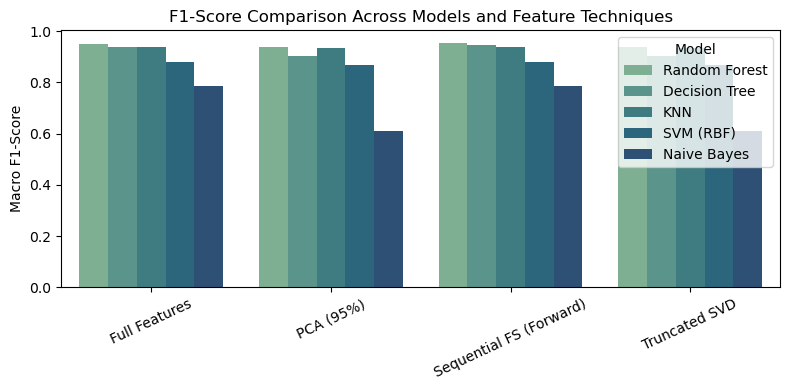

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,4))
sns.barplot(data=df_summary, x="Dataset", y="MacroF1", hue="Model", palette="crest")
plt.title("F1-Score Comparison Across Models and Feature Techniques")
plt.ylabel("Macro F1-Score")
plt.xlabel("")
plt.xticks(rotation=25)
plt.tight_layout()
plt.show()


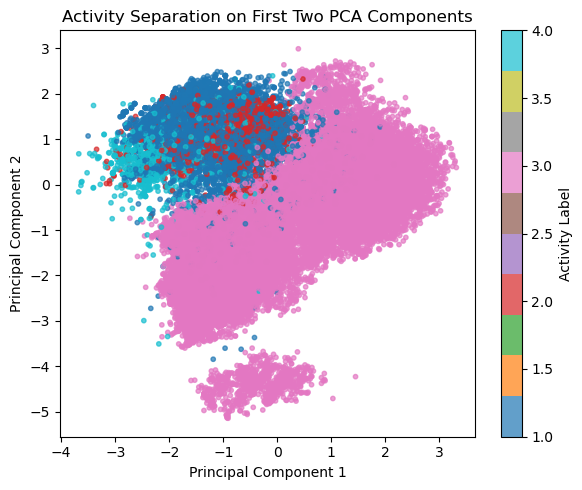

In [46]:
plt.figure(figsize=(6,5))
sc = plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c=y_train, cmap='tab10', s=10, alpha=0.7)
plt.title("Activity Separation on First Two PCA Components")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(sc, label="Activity Label")
plt.tight_layout()
plt.show()
